
# Problem Set 1 


**Name : `Suman Pal`** 

**Roll-No : `19BM6JP22`** 

**Dept : `PGDBA`** 

**Mail-ID : `sumanpba2021@email.iimcal.ac.in`** 

## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their derivations into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it by looking at examples listed below between \$..\$), he or she might pass it in pen-and-paper format, however grading of these submissions might be delayed.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file to [CSE Moodle](https://10.5.18.110/moodle/enrol/index.php?id=308) by the due date (see Schedule). If you have pen-and-paper answers, please hand them in in class on the same day. **`[ NOTE: You might need to bypass proxy for 10.5.18.110 in order to access the moodle.]`**


`Vector` stands for `column vector` below. Show all steps when proving statements.

### Problem 1: Closed-Form Maximum Likelihood

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from each $P(x \ | \ \theta)$ below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ of given distributions. 

**Q1.1**: $P(x \ | \ \theta) = \theta e^{-\theta x}$ for $x \geq 0$

**Q1.2**: $P(x \ | \ \theta) = \frac{1}{\theta}$ for $ 0 \leq x \leq \theta$

**A1.1**: $$ f_{X} = P(x \ | \ \theta) = \theta e^{-\theta x} for x \geq 0$$

Since, $(x_1, ..., x_n)$ are iid samples, their joint probability distribution is given by the product of their marginals.

$$P(x_1, x_2,\dots,x_n \ |\theta) = P(x_1 |\theta) \times P(x_2 |\theta) \times \dots P(x_n |\theta)$$

$$ =\theta^{n}\sum_{i=1}^{n}x_i$$

Since, $(x_1,...,x_n)$ are known, hence, we obtain the likelihood function as:

$$\implies L_{n}(\theta)=\prod_{i} f_{X}\left(x_{i}\right)=\theta^{n} \exp \left(-\theta \sum_{i=1}^{n} x_{i}\right)$$ 
$$\implies \ell_{n}(\theta)= \log L_{n}(\theta)=n \log \theta-\theta\left(\sum_{i=1}^{n} x_{i}\right)$$ 
$$\implies d \ell / d \theta=n / \theta-\left(\sum_{i=1}^{n} x_{i}\right)=0$$ 
$$ \implies \theta_{MLE}= n / \left(\sum_{i=1}^{n} x_{i}\right)$$

**A1.2**: $$ f_{X} = P(x \ | \ \theta) = \theta e^{-\theta x}\: for \:x \geq 0$$

Since, $(x_1, ..., x_n)$ are iid samples, their joint probability distribution is given by the product of their marginals.

$$P(x_1, x_2,\dots,x_n \ |\theta) = P(x_1 |\theta) \times P(x_2 |\theta) \times \dots P(x_n |\theta)$$


$$=\frac{1}{\theta^{n}} \ \ \ \ \forall \ \ 0 \leq x \leq \theta, 0 \: Otherwise$$

Since, $(x_1,...,x_n)$ are known, hence, we obtain the likelihood function as:

$$L(\theta \ ) = \frac{1}{\theta^{n}} \ \ \ \ \forall \ \ 0 \leq x \leq \theta$$

$$\implies l(\theta \ )= \log L_{n}(\theta) = -n\log(\theta) \ \ \ \ \forall \ \ 0 \leq x \leq \theta$$

$$\implies \frac{\partial{l(\theta \ )}}{\partial{\theta}} =-\frac{n}{\theta} \ \ \ \ \forall \ \ 0 \leq x \leq \theta$$

Hence, we can see that Maximum likelihood estimate can't be find out by merely equating the derivative to zero. But by observing the likelihood function, we can say that the function can be maximised by minimising the $\theta$. 

Thus, the minimum permissible value of $\theta$ is given by:

$$\theta_{MLE} = max(x_i)$$

### Problem 2: Gradient for Maximum Likelihood Estimation

Sometimes, we can't find MLEs in closed-form, in this case, we can use an iterative scheme to solve resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times d}$ - constant data matrix, $\mathbf x_i$ - vector corresponding to a single data point $(\mathbf x_i \in \mathbf R^{1 \times d})$
- $\theta$ is a $d$-dimensional (unknown) weight vector
- $\varepsilon \sim \text{Student}(v)$ is a $n$-dimensional (unknown) noise vector
- and we observe vector $\mathbf y = X\theta + \varepsilon$

Which means that
$$ P(y_i \ | \ \mathbf x_i, \theta, v) = \frac{1}{Z(v)} \Big(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{v}\Big)^{-\frac{v+1}{2}}$$

where $Z$ stands for a normalization constant that does not depend on $\theta$, and $v$ is a constant parameter.

Denote log-likelihood as $\mathcal L(\theta)$ and log-likelihood for a single sample $i$ as $\mathcal L_i(\theta) = \mathcal L(\theta \ | \ \mathbf x_i, y_i)$.

**Q2.1**: Find $\frac{\partial \mathcal L_i(\theta)}{\partial \theta}$.

**A2.1**: The Likelihood of the function is given by:
$$ L_{i}(\theta)=P(y_i \ | \ \mathbf x_i, \theta, v) = \frac{1}{Z(v)} \Big(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{v}\Big)^{-\frac{v+1}{2}}$$

Thus, the Log-likelihood function is:

$$\implies \mathcal L_i(\theta) = \log L_{i}(\theta) = -\log{Z(v)} - \frac{v+1}{2} \sum_{i=1}^{n} \log \left(v+(\theta^T \mathbf x_i - y_i)^2)\right) +\frac{v+1}{2}(\log{v}) $$
$$\implies  \frac{\partial \mathcal L_i(\theta)}{\partial \theta} = - \frac{v+1}{2}*(\frac{2(\theta^T \mathbf x_i - y_i)}{v+(\theta^T \mathbf x_i - y_i)^2})* \frac{\partial (\theta^T \mathbf x_i - y_i)}{\partial \theta}$$.
$$\implies \frac{\partial \mathcal L_i(\theta)}{\partial \theta} = - \frac{v+1}{2}*(\frac{2\mathbf x_i(\theta^T \mathbf x_i - y_i)}{v+(\theta^T \mathbf x_i - y_i)^2}) $$

**Q2.2**: Check the result obtained in the previous section by coding an SGD for $\mathcal L(\theta)$ and plotting how function value changes as a function of a number of passed gradient steps. Try multiple learning rates (1e-1, 1e-3, 1e-6), explain the result. Consider $Z(v)=1$ and $v=4$ for plotting.

We marked places where you are expected to add/change your own code with **`## -- ! code required`** comment.

In [1]:
%matplotlib inline

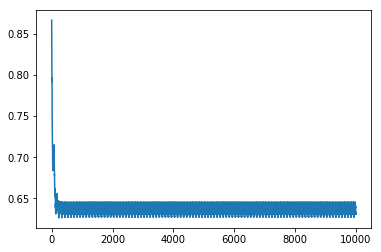

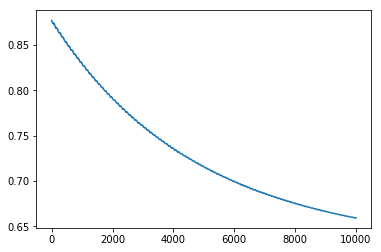

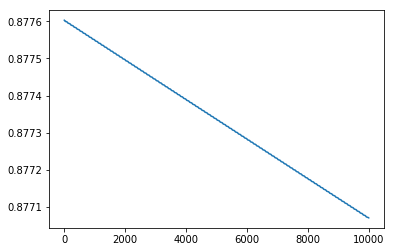

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, d=10, v=4):
    X = np.random.rand(n, d)*2-1
    theta = np.random.rand(d, 1)
    noise = np.random.standard_t(4, n).reshape((-1, 1))
    return X, X @ theta + noise

def loss(X, y, theta,v=4):
    ## ! -- code required
    return ((v+1)/2)*np.mean(np.log(1 + ((X @ theta - y)**2)/v))


def loss_grad_i(X, y, theta,i,v=4):
    ## ! -- code required
    return ((v+1)/2)*(X[i,:].reshape(-1,1)*((X[i,:] @ theta - y[i])/v)*(1/(1 + ((X[i,] @ theta - y[i])**2)/v)))
    

def sgd_plot(theta_init, X, y, n_steps=100):
    for learning_rate in [1e-1, 1e-3, 1e-6]:
        theta = theta_init.copy()
        losses = []  
        for step_n in range(n_steps):
            for i in range(X.shape[0]):
                theta = theta - learning_rate* loss_grad_i(X,y,theta,i)
                loss_i =  loss(X,y,theta)
                losses.append(loss_i)
        
        plt.plot(losses)
        plt.show()
    
def main(n=100, d=10, v=4):
    X, y = generate_data(n, d, v)
    theta_init = np.random.rand(d, 1)
    sgd_plot(theta_init, X, y)
    
main()

**`[double click here to add a solution]`**

### Problem 3: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times d}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $d$-dimensional random vector (`This is a prior information that` $\theta$ `follows normal distribution`)
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

or, in other words: there exists some data $X$, we sample weights vector $\theta$ of the corresponding shape from multivariate normal distribution, multiply features from $X$ by weights from $\theta$, add random logistically distributed noise to resulting numbers, and observe whether resulting (noisy) random variable exceeds zero. So we are given the data matrix X and y, we want to estimate the weight vector $\theta$ as accurately as possible. 

**`Show that given model definition above, the following holds:`**

**Q3.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function. Do not get confused between standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties) and [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution.
 
 **Hints:** 
 
 - for a random variable $\zeta \sim P$ what is $P(\zeta \leq a)$ ? (answer: $F_{\zeta}(a)$ - value of cumulative density function for the distribution of $\zeta$)

**A3.1**: $$ P(y_i = 1 \ | \ \theta, \mathbf x_i) = P(X \theta + \varepsilon \geq 0 \ | \ \theta, \mathbf x_i)$$

$$\implies P(y_i = 1 \ | \ \theta, \mathbf x_i) = P(\varepsilon \geq -X \theta \ | \ \theta, \mathbf x_i) $$

$$\implies P(y_i = 1 \ | \ \theta, \mathbf x_i) = 1- F_{\varepsilon}(-\theta^T \mathbf x_i )$$

$F_{\varepsilon}$ -  value of cumulative density function for the distribution of $\varepsilon$

We know that for logistic distribution $F(x ; \mu, s)=\frac{1}{1+e^{-(x-\mu) / s}};$ Given $\mu=0 $ and $s=\sigma_\epsilon $ <br>   

$$\implies P(y_i = 1 \ | \ \theta, \mathbf x_i) = 1- \frac{1}{1+e^{(\theta^T \mathbf x_i /\sigma_\epsilon) }}$$

$$\implies P(y_i = 1 \ | \ \theta, \mathbf x_i) = \frac{e^{(\theta^T \mathbf x_i /\sigma_\epsilon)}}{1+e^{(\theta^T \mathbf x_i /\sigma_\epsilon) }}  $$ 

$$ \implies P(y_i = 1 \ | \ \theta, \mathbf x_i) = \frac{1}{1+e^{-(\theta^T \mathbf x_i /\sigma_\epsilon) }}  $$  

$$\implies P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$$  

Let us consider $\sigma_{\epsilon} = 1$ everywhere further.

**Q3.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

**A3.3:** 
$y_i$ follows a Bernoulli distribution with probabilities:

$$ P ( y_i = 1 | \boldsymbol \theta, \mathbf x_i )= \text{logistic}\Big(\theta^T \mathbf x_i\Big)$$

&

$$ P ( y_i = 0 | \boldsymbol \theta, \mathbf x_i )= 1- \text{logistic}\Big(\theta^T \mathbf x_i\Big)$$

Hence, its probability mass function can be written as:

$$  P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$$

**Q3.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

$$  P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$$

$$ \implies \log P(y_i \ | \ \theta, \mathbf x_i) = y_i(log(\text{logistic}(\theta^T \mathbf x_i))) + (1-y_i)(\log(1-\text{logistic}(\theta^T \mathbf x_i)))$$

$$ \implies \log P(y_i \ | \ \theta, \mathbf x_i) = y_i(log(\frac{e^{(\theta^T \mathbf x_i /\sigma_\epsilon)}}{1+e^{(\theta^T \mathbf x_i /\sigma_\epsilon) }} )) + (1-y_i)(\log(\frac{1}{1+e^{(\theta^T \mathbf x_i /\sigma_\epsilon) }})) $$

$$ \implies \log P(y_i \ | \ \theta, \mathbf x_i) = y_i(log(e^{(\theta^T \mathbf x_i /\sigma_\epsilon)}))-y_i(\log({1+e^{(\theta^T \mathbf x_i /\sigma_\epsilon) }} )) + (1-y_i)(-\log(1+e^{(\theta^T \mathbf x_i /\sigma_\epsilon) })) 
$$

$$ \implies \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$$

The vector $\mathbf 1_{n \times 1}$ denotes column of ones.

**Q3.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $

**A3.4:** $$ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta)=\sum_{i}\log P(y_i \ | \ \theta, \mathbf x_i) $$

$$ \implies \mathcal L_{MLE}(\theta) = \sum_{i}(y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i)))$$

$$ \implies \mathcal L_{MLE}(\theta) = \sum_{i}(y_i \theta^T \mathbf x_i) - \sum_{i}(\log(1 + \exp(\theta^T \mathbf x_i)))$$

$$ \implies \mathcal L_{MLE}(\theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta))$$   

One way of estimating true weight vector $\theta$ is by finding an MLE estimate. To make use of prior information,  one might want to find [maximum a posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that can be derived from likelihood $P(X|\theta)$ and prior $P(\theta)$ over weights as following (Bayes rule):

$$
\begin{align}
\theta_{MAP} &= \arg\max_\theta P(\theta | X) = \arg\max_\theta \frac{P(X|\theta)P(\theta)}{\int_{\Theta} P(X|\theta)P(\theta) d \theta} = \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) - \log \int_{\Theta} P(X|\theta)P(\theta) d \theta \big] \\ &= \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) \big] = \arg\max_\theta \mathcal L_{MAP}(\theta)
\end{align}
$$

In the model definition above, normal prior over weights is specified by line $\theta_j \sim \mathcal N(0, \sigma_\theta)$, which essentially means that "weight vector components should not be too far from zero".

**Q3.5**: $\mathcal L_{MAP}(\theta) = \log P(\theta \ | \ X, \mathbf y) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||^2_2 + C$

$\lambda = \frac{1}{2\sigma_\theta^2}$, $C$ - term that does not include $\theta$

**A3.3:** 
$$\theta_{MAP} = \arg\max_\theta P(\theta |\mathcal D_n) = \arg\max_\theta \big[ \log P(\mathcal D_n|\theta) + \log P(\theta) \big]$$

$$ \implies \mathcal L_{MAP}(\theta) = P(\theta |\mathcal D_n) = \log P(\mathcal D_n|\theta) + \log P(\theta) =  \mathcal L_{MLE}(\theta) + \log P(\theta) $$

<br><center>We know $\log P(\theta) = \log \mathcal{N}\left(\theta | 0, \lambda^{-1} \theta\right)= \log(\frac{1}{(2 \pi\sigma_\theta^2)^{1 / 2}} \exp \left(-\frac{1}{2\sigma_\theta^2} \theta^{\top} \theta\right))=-\frac{1}{2}\log(2 \pi\sigma_\theta^2) - \frac{1}{2\sigma_\theta^2} \theta^{\top} \theta $<br>

$$\implies\mathcal L_{MAP}(\theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||^2_2 + C$$

$\lambda = \frac{1}{2\sigma_\theta^2}$, $C$ - term that does not include $\theta$

**Q3.6**: $\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta $

**Note:**
* The solution below follows **Jacobian formulation / Numerator layout**
* The question uses **Hessian layout**
* A simple transpose operation on the end result will convert it to Hessian layout

$$ \mathcal L_{MAP}(\theta) = y^TX\boldsymbol\theta -   \mathbf 1^T\cdot \log (\mathbf 1_{n\times1} + e^{X\boldsymbol \theta}) - \lambda || \boldsymbol\theta||^2_2 + C $$

$$\implies L_{MAP}(\theta) = y^TX\boldsymbol\theta -   \mathbf 1^T\cdot \log (\mathbf 1_{n\times1} + e^{X\boldsymbol \theta}) - \lambda \boldsymbol\theta^T \boldsymbol\theta + C $$

$$\implies \frac{\partial \mathcal L_{MAP}(\theta)}{\partial \boldsymbol\theta} = \frac{\partial (y^TX\boldsymbol\theta - \mathbf 1^T \log (\mathbf 1_{n\times1} + e^{X\boldsymbol \theta}))}{\partial \boldsymbol\theta} $$

$$=y^T_{1 \times n}X_{n \times d} - \mathbf 1^T_{1 \times n} \frac{\partial\log (\mathbf 1_{n\times1} + e^{X\boldsymbol \theta}) }{\partial \boldsymbol \theta} - 2\lambda \theta^T \tag{1}$$


$$\log (\mathbf 1_{n\times1} + e^{X\boldsymbol \theta})=\begin{bmatrix} \log(1+ e^{\mathbf x_1^T \theta}) \\ \log(1+ e^{\mathbf x_2^T\theta}) \\ \vdots \\ \log(1+ e^{\mathbf x_n^T\boldsymbol\theta}) \end{bmatrix}_{n \times 1} $$
\
$$ \frac{\partial\log (\mathbf 1_{n\times1} + e^{X\boldsymbol \theta}) }{\partial \boldsymbol \theta} =  \begin{bmatrix} \frac{\partial \log(1+ e^{\mathbf x_1^T \theta})}{\partial \theta_1} & \frac{\partial \log(1+ e^{\mathbf x_1^T \theta})}{\partial \theta_2} & \dots & \frac{\partial \log(1+ e^{\mathbf x_1^T \theta})}{\partial \theta_d} \\ \frac{\partial \log(1+ e^{\mathbf x_2^T \theta})}{\partial \theta_1} & \frac{\partial \log(1+ e^{\mathbf x_2^T \theta})}{\partial \theta_2} & \dots & \frac{\partial \log(1+ e^{\mathbf x_2^T \theta})}{\partial \theta_d} \\ \vdots & \vdots & \dots & \vdots \\ \frac{\partial \log(1+ e^{\mathbf x_n^T \theta})}{\partial \theta_1}& \frac{\partial \log(1+ e^{\mathbf x_n^T \theta})}{\partial \theta_d} & \dots & \frac{\partial \log(1+ e^{\mathbf x_n^T \theta})}{\partial \theta_d}\end{bmatrix}_{n \times d}$$
\
$$= \begin{bmatrix} x_{11}\frac{e^{\mathbf x_1^T \theta}}{1+ e^{\mathbf x_1^T \theta}} & x_{12}\frac{e^{\mathbf x_1^T \theta}}{1+ e^{\mathbf x_1^T \theta}} & \dots & x_{1d}\frac{e^{\mathbf x_1^T \theta}}{1+ e^{\mathbf x_1^T \theta}} \\ x_{21}\frac{e^{\mathbf x_2^T \theta}}{1+ e^{\mathbf x_2^T \theta}} & x_{22}\frac{e^{\mathbf x_2^T \theta}}{1+ e^{\mathbf x_2^T \theta}} & \dots & x_{2d}\frac{e^{\mathbf x_2^T \theta}}{1+ e^{\mathbf x_2^T \theta}} \\ \vdots & \vdots & \dots & \vdots \\ x_{n1}\frac{e^{\mathbf x_n^T \theta}}{1+ e^{\mathbf x_n^T \theta}}& x_{n2}\frac{e^{\mathbf x_n^T \theta}}{1+ e^{\mathbf x_n^T \theta}} & \dots & x_{nd}\frac{e^{\mathbf x_n^T \theta}}{1+ e^{\mathbf x_n^T \theta}}\end{bmatrix}_{n \times d} $$
\
$$= \begin{bmatrix}  x_{11}\text{logistic}( \mathbf x_1^T \theta ) & x_{12}\text{logistic}( \mathbf x_1^T \theta ) & \dots & x_{1d}\text{logistic}( \mathbf x_1^T \theta ) \\ x_{21}\text{logistic}( \mathbf x_2^T \theta ) & x_{22}\text{logistic}( \mathbf x_2^T \theta ) & \dots & x_{2d}\text{logistic}( \mathbf x_2^T \theta ) \\ \vdots & \vdots & \dots & \vdots \\ x_{n1}\text{logistic}( \mathbf x_{n}^T \theta) & x_{n2}\text{logistic}( \mathbf x_{n}^T \theta) & \dots & x_{nd}\text{logistic}( \mathbf x_{n}^T \theta) \end{bmatrix}_{n \times d}$$
\
$$ \implies \mathbf 1^T\frac{\partial\log (\mathbf 1_{n\times1} + e^{X\boldsymbol \theta}) }{\partial \boldsymbol \theta} = \begin{bmatrix} 1 & 1 & \dots & 1 \end{bmatrix}_{1 \times n}\begin{bmatrix}  x_{11}\text{logistic}( \mathbf x_1^T \theta ) & x_{12}\text{logistic}( \mathbf x_1^T \theta ) & \dots & x_{1d}\text{logistic}( \mathbf x_1^T \theta ) \\ x_{21}\text{logistic}( \mathbf x_2^T \theta ) & x_{22}\text{logistic}( \mathbf x_2^T \theta ) & \dots & x_{2d}\text{logistic}( \mathbf x_2^T \theta ) \\ \vdots & \vdots & \dots & \vdots \\ x_{n1}\text{logistic}( \mathbf x_{n}^T \theta) & x_{n2}\text{logistic}( \mathbf x_{n}^T \theta) & \dots & x_{nd}\text{logistic}( \mathbf x_{n}^T \theta) \end{bmatrix}_{n \times d}$$
\
$$= \begin{bmatrix} \sum_{i=1}^n x_{i1}\text{logistic}(\mathbf x_i^T \boldsymbol\theta) & \sum_{i=1}^n x_{i2}\text{logistic}(\mathbf x_i^T \boldsymbol\theta) & \dots & \sum_{i=1}^n x_{id}\text{logistic}(\mathbf x_i^T \boldsymbol\theta)\end{bmatrix}_{1 \times d}$$
\
$$= \begin{bmatrix} \text{logistic}( \mathbf x_1^T \theta) & \text{logistic}( \mathbf x_2^T \theta) & \dots & \text{logistic}( \mathbf x_n^T \theta ) \end{bmatrix}_{1 \times n} \begin{bmatrix} x_{11} & x_{12} & \dots & x_{1d} \\ x_{21} & x_{22} & \dots & x_{2d} \\ \vdots & \vdots & \vdots \\ x_{n1} & x_{n2} & \dots & x_{nd}  \end{bmatrix}_{n \times d}$$
\
$$= \text{logistic}\big(\begin{bmatrix} \mathbf x_1^T \theta & \mathbf x_2^T \theta & \dots &  \mathbf x_n^T \theta \end{bmatrix}_{1 \times n} \big) \begin{bmatrix} x_{11} & x_{12} & \dots & x_{1d} \\ x_{21} & x_{22} & \dots & x_{2d} \\ \vdots & \vdots & \vdots \\ x_{n1} & x_{n2} & \dots & x_{nd}  \end{bmatrix}_{n \times d}$$
\
$$ = \text{logistic} (\boldsymbol \theta^T X^T )X\tag{2}$$

Putting $(2)\ in \ (1)$:

$$ \frac{\partial \mathcal L_{MAP}(\theta)}{\partial \boldsymbol\theta} = (y^T_{1 \times n} - \text{logistic} (\boldsymbol \theta^T X^T ))X_{n \times d} - 2\lambda \theta^T $$

Converting it to **Hessian Layout**:
$$ \frac{\partial \mathcal L_{MAP}(\theta)}{\partial \boldsymbol\theta} = X_{d \times n}^T (y_{n \times 1} - \text{logistic} (X \boldsymbol \theta )_{n \times 1}) - 2\lambda \theta_{d \times 1} $$

### Problem 4: Coding Logistic Regression

**Don't be scared by the size of the coding part!** If you find my code below horribly disgusting or amazingly incomprehensible (underscore one) and don't want to read it, you can skip most parts that do not have **`## ! -- code required`** comment in them and just execute the rest without reading. However, I highly encourage you not to do so, to fully dive into the Zen of Python Plotting (a very useful skill!). Some bonuses and my personal respect will be granted to those who will tweak the plotting code in the coolest way or show intersting extra results.

Here's the code that generates data according to model specification (**Problem 3**) and plots for `k_features=2`.

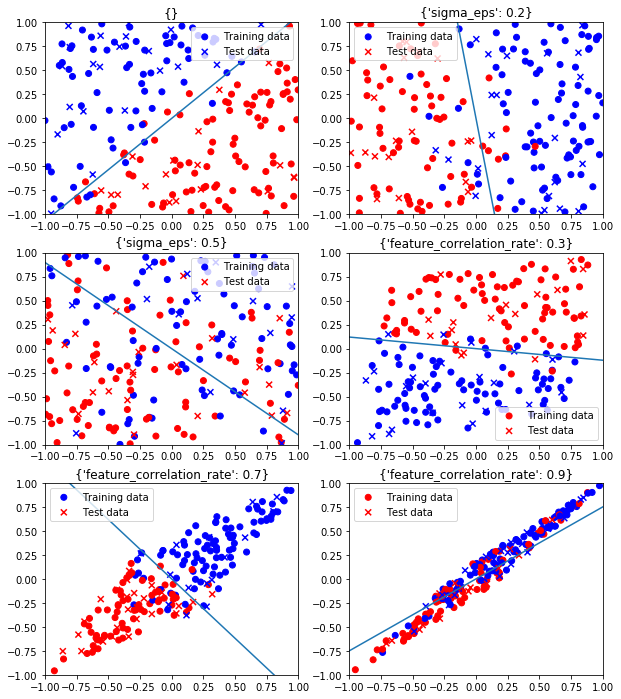

In [3]:
import numpy as np

## generating data
def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    assert 0 <= feature_correlation_rate <= 1
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues)[:, np.newaxis] # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples)[:, np.newaxis]
    y = ((X @ theta_real + noise) > 0).astype(np.int16)
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real

## plotting figure
def plot_2d_data(subfig, X, y, X_test, y_test, theta):
    assert len(X.shape) == 2
    subfig.scatter(X[:, 0], X[:, 1], color = [['r', 'b'][c] for c in np.ravel(y)], label="Training data")
    point_color_arr = [['r', 'b'][c] for c in np.ravel(y_test)]
    subfig.scatter(X_test[:, 0], X_test[:, 1], marker='x', color = point_color_arr, label="Test data")
    subfig.plot((1, -1), (-theta[0]/theta[1], theta[0]/theta[1]))
    subfig.set_xlim(-1, 1)
    subfig.set_ylim(-1, 1)

## figure structure formation
def subfig_iter(it, val_name=None, n_col=2, base_size=(10,2), title=None, fmt='%s'):
    n_rows = int(len(it)/n_col) + len(it) % n_col ####
    size = (base_size[0], base_size[1]*len(it))
    fig, _axes = plt.subplots(n_rows, n_col, figsize=size)
    for subfig, val in zip(np.ravel(_axes).tolist(), it): 
        yield (val, subfig)
        if val_name is not None:
            if val_name == '':
                subtitle = fmt % (val)
            else:
                subtitle = ('%s = '+fmt) % (val_name, val)
            subfig.set_title(subtitle)
            subfig.legend(loc='best')
    if title is not None:
        fig.suptitle(title, verticalalignment='top') 

## Compiling the functions
def test_draw():
    data_args_dicts = [
        dict(), {'sigma_eps': 0.2}, {'sigma_eps': 0.5}, {'feature_correlation_rate': 0.3}, 
        {'feature_correlation_rate': 0.7}, {'feature_correlation_rate': 0.9},
    ]
    for arg_dict, subfig in subfig_iter(data_args_dicts, val_name=''):
        data = generate_logistic_regression_data(**arg_dict)
        X_train, y_train, X_test, y_test, theta_real = data
        plt.title(str(arg_dict))
        plot_2d_data(subfig, X_train, y_train, X_test, y_test, theta_real)
        
    plt.show()

test_draw()

**Q4.1.1**: When we use `feature_correlation_rate` ($\alpha$) the following happens: we construct a matrix $M$ that has values $1 - \frac{n-1}{n}\alpha$ on the diagonal and values $\frac{\alpha}{n}$ everywhere else. What happens to resulting matrix $MX$ if $\alpha$ is either 0 or 1? (If you do not know what feature correlation is here is a link that can help. [Feature Correlation](https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf))

**A4.1.1**
Note: 
1. For our problem, $k = 2$ [ $k$ is number of features ]
2. M is a $k \times k$ matrix and X is an $n \times k$ matrix. Hence, the matrix multiplication will be $XM$

* **Case 1: $\alpha$ = 0**
Mathematically, it leads to the $M$ = $I$
Hence, $MX$ = $X$
This is evident from the fact that if $\alpha$ = $0$, the diagonal elements of the matrix $M$ become $1$ whereas the off-diagonal elements become $0$.

$$M_{k * k} = \begin{bmatrix} (1 - \frac{n-1}{n}0) & \frac{0}{n} & ... & \frac{0}{n} \\ \frac{\alpha}{n} & (1 - \frac{n-1}{n}0) & ... & \frac{0}{n} \\ : & : & : & :\\ \frac{0}{n} & \frac{0}{n} & ...& (1 - \frac{n-1}{n}0) \end{bmatrix}$$ 
\
$$= \begin{bmatrix} 1  & 0 & ... & 0  \\ 0 & 1 & ... & 0 \\ : & : & : & :\\ 0 & 0 & ... & 1 \end{bmatrix}$$ 

Intuitively, $\alpha$ = 0 means that the features are uncorrelated. Hence, the mixture matrix will not impose any relationship between the features. Thus, it should be an identity matrix.

Therefore, $$XM = X$$


* **Case 2: $\alpha$ = 1**

$$M_{k \times k} = \begin{bmatrix} (1 - \frac{n-1}{n}1) & \frac{1}{n} & ... & \frac{1}{n} \\ \frac{1}{n} & (1 - \frac{n-1}{n}1) & ... & \frac{1}{n} \\ : & : & : & :\\ \frac{1}{n} & \frac{1}{n} & ... & (1 - \frac{n-1}{n}1) \end{bmatrix}$$ 
\
$$ = \begin{bmatrix} \frac{1}{n} & \frac{1}{n} & ... &\frac{1}{n} \\ \frac{1}{n} & \frac{1}{n} & ... &\frac{1}{n} \\ : & : & : & :\\  \frac{1}{n} & \frac{1}{n} &... & \frac{1}{n} \end{bmatrix}$$ 
\
$$ = \frac{1}{n}\begin{bmatrix} 1 & 1 &  ... &1 \\1 & 1 &  ... & 1 \\ : & : & : & :\\ 1 & 1 &  ... & 1 \end{bmatrix}$$


For $k = 2$,
$$M_{2 \times 2} = \frac{1}{n}\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} $$
\
$$X_{n \times 2} = \begin{bmatrix} x_{11} & x_{21} \\ x_{12} & x_{22} \\ x_{13} & x_{23} \\ : & : \\ x_{1n} & x_{2n}\end{bmatrix} $$
\
$$XM = \frac{1}{n} \begin{bmatrix} x_{11} + x_{21} & x_{11} + x_{21} \\ x_{12} + x_{22} & x_{12} + x_{22} \\ : & : \\ x_{1n} + x_{2n} & x_{1n} + x_{2n} \end{bmatrix} $$ 

Thus, we see that both the features become same when $\alpha = 1$.


**Q4.2**: Why did we implement $\text{softplus}(x) = \log(1+\exp(x))$ as shown below? What is numerical under- and overflow and how people deal with it?

**Reason for the proposed implementation of softplus**
The proposed implementation of approximating $\text{softplus}(x) = \log(1+\exp(x))$ with x has been adopted to avoid numerial overflow of $e^{x}$ for large values of x.

$$ Let, \: g(x) = \log(1+\exp(x)) $$

$$ and, \: h(x) = x $$

$$ and, f(x) = g(x) - h(x) $$

$$ \implies \frac{\partial \mathcal f(x)}{\partial x} = \frac{\partial \mathcal g(x)}{\partial x} - \frac{\partial \mathcal h(x)}{\partial x}$$

$$ = \frac{e^{x}}{1+e^{x}} - 1 $$

$$ = -\frac{1}{1+e^{x}} \approx 0 \: \forall \: x \geq 5 $$

And also,

$$ f(5) \approx 0 $$

Hence, from the above mathematical formulations we can conclude that,

$$ f(x) \approx 0 \: \forall \: x \geq 5 $$

$$ \implies g(x) = h(x) \: \forall \: x \geq 5 $$ 

**Numerical underflow and overflow** 
*Underflow* occurs when a calculation generates a number which is smaller than what the computer can represent. 
*Overflow* occurs when a calculation generates a number which is larger than what the computer can represent. 

Overflow and underflow can be dealt in different ways depending upon the context they are arising. 
* Using a different datatype
* Using logarithms
* Using approximations

In [4]:
import numpy as np

def softplus(x_, limit=5):
    x = np.array(x_)
    compute_real_mask = np.logical_and(-limit < x, x < limit)
    return_same_mask = x >= limit
    computed_real_part = np.log(1 + np.exp(x*compute_real_mask)*compute_real_mask)
    returned_same_part = x*return_same_mask
    return computed_real_part + returned_same_part

def test_softplus():
    x_arr = np.linspace(-200, 200)
    softplus_true = np.log(1 + np.exp(x_arr))
    softplus_stable = softplus(x_arr)
    assert np.max(abs(softplus_true-softplus_stable)) < 1e-3
    
test_softplus()

def logistic(x):
    return 1/(1+np.exp(-x))

**Q4.3**: Write (by filling in the missing code below) Gradient Descent and Stochastic Gradient Descent algorithm for the MAP loss and plot 

- MAP loss
- L2 distance between current theta and true one
- cosine distance between current theta and true one

use results from **Q3.6**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred as "the negative log-likelihood".

In [9]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_MAP_loss(X, y, theta_current, lambd):
    return -(np.transpose(y) @ X @ theta_current - np.sum(np.log(1+np.exp(X @ theta_current))) - lambd*(norm(theta_current)**2))

def logistic_MAP_loss_gradient(X, y, theta_current, lambd):
    return -(np.transpose(X) @ (y-logistic(X @ theta_current)) - 2*lambd*theta_current)

def logistic_MAP_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_MAP_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    y_predicted = (X @ theta_current >= 0).astype(int)
    accuracy = np.mean((y_predicted == y).astype(int))
    return accuracy

def run_MAP_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        theta = theta - learning_rate* logistic_MAP_loss_gradient(X,y,theta,lambd)/X.shape[0]
        steps.append(theta)
    return steps

def run_MAP_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            theta = theta - learning_rate* logistic_MAP_loss_single_gradient(X,y,smaple_id,theta,lambd)  
        
        steps.append(theta)
        
    return steps

C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


gd runtime: 0.21738729999924544


C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


sgd runtime: 5.20999699999993


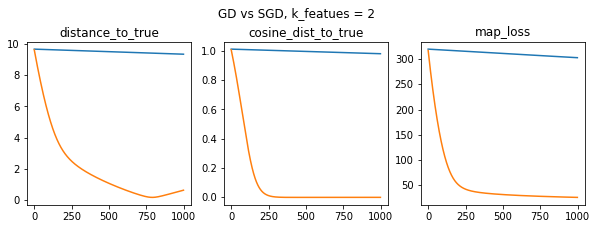

0.9
gd runtime: 1.2914392999991833
sgd runtime: 6.041713799999343


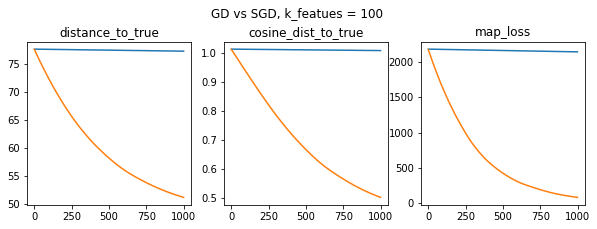

0.55


In [13]:
import time
import random

def draw_gd_plots(axes, theta_steps, X, y, lambd, theta_real):
    collected_val_dicts = []
    for theta in theta_steps:
        collected_val_dicts.append({
                'distance_to_true': np.linalg.norm(theta-theta_real),
                'cosine_dist_to_true': cosine(theta, theta_real),
                'map_loss': float(logistic_MAP_loss(X, y, theta, lambd)),
            })
        
    
    for plot_id, key in enumerate(collected_val_dicts[0].keys()):
        subfig = axes[plot_id]
        subfig.set_title(key)
        subfig.plot(list(d[key] for d in collected_val_dicts))

def main():
    for k_featues in [2, 100]:
        data_args = {'n_samples': 200, 'k_featues': k_featues, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        fig, axes = plt.subplots(1, 3, figsize=(10,3))
        lamdb = 0
        
        now = time.clock()
        steps = run_MAP_gd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        print('gd runtime:', time.clock() - now)

        
        now = time.clock()
        steps = run_MAP_sgd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        fig.suptitle('GD vs SGD, k_featues = %d' % k_featues, verticalalignment='bottom')
        print('sgd runtime:', time.clock() - now)
        
        plt.show()
    
main()

**Q4.3.1**: We expect loss to gradually decrease. Re-run code above several times (sgd might work differently). Explain plots above.

**A4.3.1:**<br>
**Note:** We are plotting distance_to_true,cosine_distance_to_true and map_loss with respect to number of epochs. In GD, number of epochs is equal to number of iterations but in SGD, number of epochs * number of observations is equal to number of iterations. So, while comparing same number of epochs and same learning rate, SGD converge faster than the GD. As the number of features are increasing, runtime of GD increases drastically whereas runtime of SGD doesnt increase much as compared to SGD.



**distance_to_true:** This plot indicates how the distance between output theta at end of each iteration and theta_real varies.  Here we refer to **L2 distance**. We expect it to **decrease** as iterations proceed and are nearly observing the same phenomenon. 

**cosine_distance_to_true:** This plot indicates how the cosine distance between output theta at end of each iteration and theta_real varies. Here the distance we are referring to is cosine distance = (1- cosine similarity). We expect this to **decrease** as iterations proceed as cosine similarity increases  and are observing the exact phenomenon.

**map_loss:** This plot indicates how the MAP loss is varying. We expect it to **decrease** as iterations proceed and are nearly observing the same phenomenon. The MAP loss **converging** in the case of SGD. However, in GD case, the MAP_loss is decreasing but did not converge in the given number of iterations.

.

.

.

Wow, you made it this far, that is impressive. Congratulations!